# **Importing Libraries**

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [180]:
df = pd.read_csv('power.csv')
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [181]:
df.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989


 We can see that the data is of 1 year with time interval of 10 mins

In [182]:
df.sample(10)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
36415,09-10-2017 21:10,22.68,84.60,0.279,0.069,0.156,44799.29204
46953,11/23/2017 1:30,7.95,82.10,4.916,0.048,0.130,23532.30769
3151,1/22/2017 21:10,12.36,64.97,0.088,0.062,0.096,42312.91139
49714,12-12-2017 05:40,16.43,64.55,0.081,0.033,0.141,22326.99620
42293,10/21/2017 16:50,21.76,75.70,4.924,115.400,97.400,33179.86871
42864,10/25/2017 16:00,20.80,80.70,0.082,132.400,111.400,30948.97155
50894,12/20/2017 10:20,15.68,70.20,0.073,159.600,139.800,30144.48669
47526,11/27/2017 1:00,11.89,82.60,0.079,0.051,0.122,24424.61538
43344,10/29/2017 0:00,16.88,79.70,4.916,0.051,0.145,26714.04814
12224,3/26/2017 21:20,15.09,76.10,0.080,0.033,0.141,43592.17021


# **Perform Basic EDA**

In [183]:
df.shape

(52416, 7)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime             52416 non-null  object 
 1   Temperature          52416 non-null  float64
 2   Humidity             52416 non-null  float64
 3   WindSpeed            52416 non-null  float64
 4   GeneralDiffuseFlows  52416 non-null  float64
 5   DiffuseFlows         52416 non-null  float64
 6   PowerConsumption     52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


Datetime is string so we have to convert it into datetime type

In [185]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120


In [186]:
df.isnull().sum()

Datetime               0
Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64

No Missing Values Present

In [187]:
df.duplicated().sum()

np.int64(0)

No duplicate values are present

In [188]:
val1 = df.iloc[10]
print(val1)

Datetime               01-01-2017 01:40
Temperature                       5.516
Humidity                           77.5
WindSpeed                         0.081
GeneralDiffuseFlows               0.051
DiffuseFlows                      0.108
PowerConsumption            23896.70886
Name: 10, dtype: object


In [189]:
val2 = df.iloc[1728]
print(val2)

Datetime               1/13/2017 0:00
Temperature                     15.18
Humidity                         83.6
WindSpeed                       0.079
GeneralDiffuseFlows             0.048
DiffuseFlows                    0.148
PowerConsumption          29401.51899
Name: 1728, dtype: object


We can see that there is difference in format of datetime in some columns

In [190]:
df['Datetime'] = df['Datetime'].astype(str).str.replace('/', '-', regex=False)

There are some format difference in datetime so before converting it into datetime type from string we have to convert the whole column in same format to avoid anomalies

In [191]:
# Convert 'Datetime' to datetime type safely
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Drop invalid datetime rows
df = df.dropna(subset=['Datetime'])

# Sort by time (important for time series)
df = df.sort_values('Datetime')

# Set datetime as index
df.set_index('Datetime', inplace=True)

# Create minimal, useful time features
df['time_fraction'] = df.index.hour + df.index.minute / 60.0
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month


This code converts the 'Datetime' column to datetime objects using the format day-month-year

In [192]:
df.shape

(52416, 9)

# **Univariate Analysis**

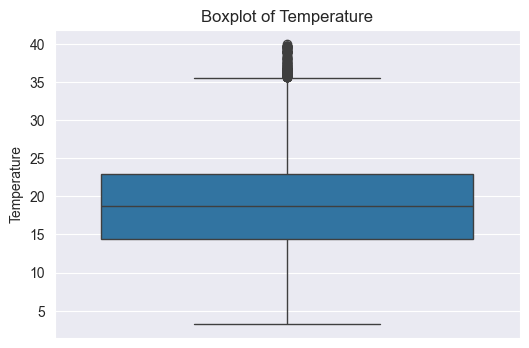

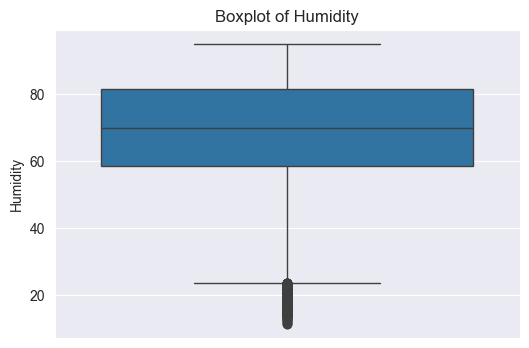

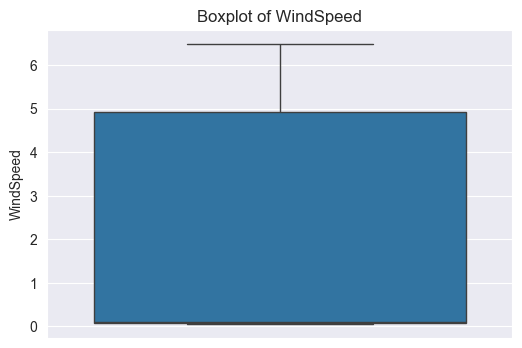

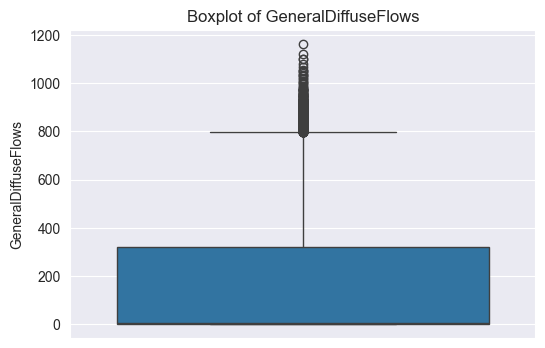

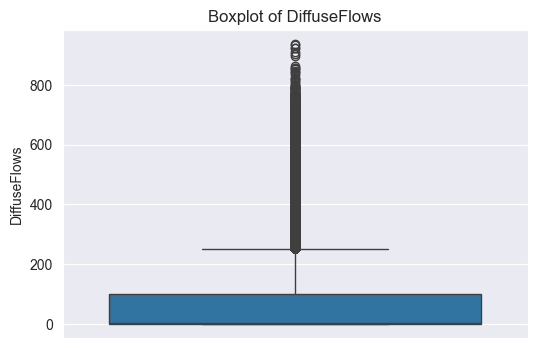

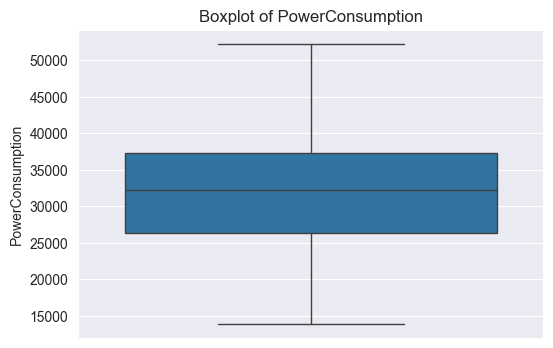

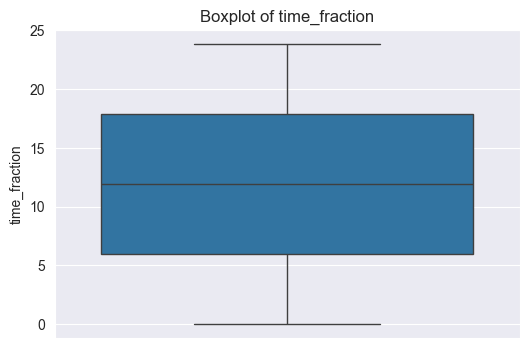

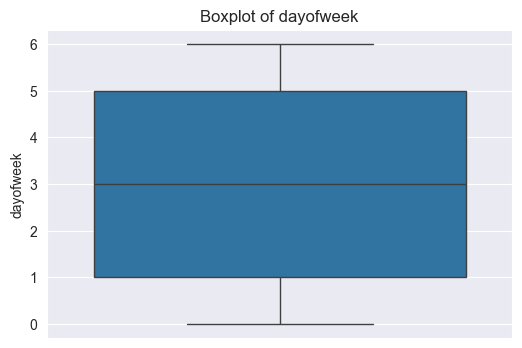

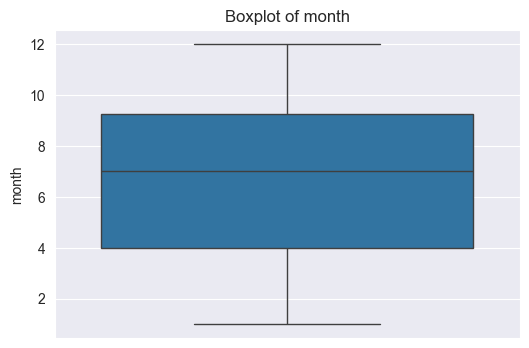

In [193]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

From the boxplots generated for the dataset, we can observe that there are outliers present in the Temperature, Humidity, Diffuse Flows, and General Diffuse Flows columns.So first we have to handle outliers before training the model

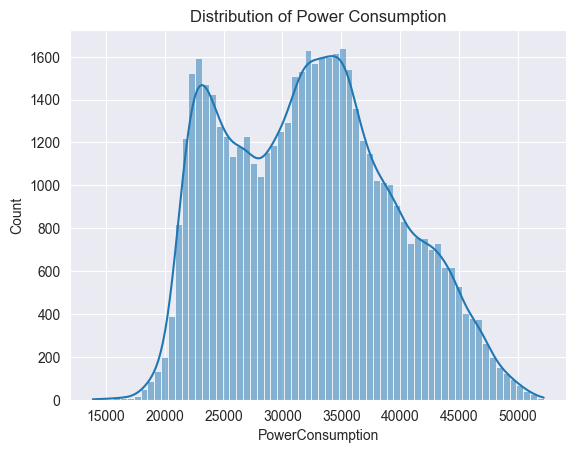

In [194]:
sns.histplot(df['PowerConsumption'], kde=True)
plt.title('Distribution of Power Consumption')
plt.show()

The distribution appears right-skewed, with more data concentrated around 25,000–35,000 units
There are fewer high consumption values above 45,000, which are less frequent.
Peaks indicate common ranges of power consumption.

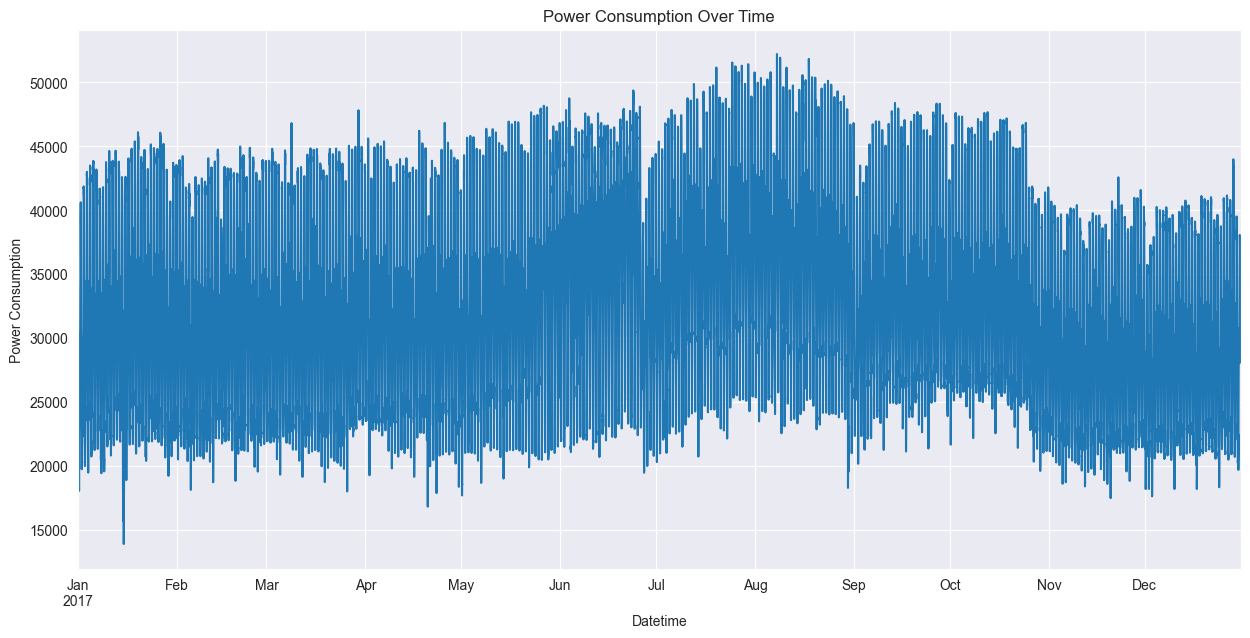

In [195]:
df['PowerConsumption'].plot(figsize=(15, 7))
plt.title('Power Consumption Over Time')
plt.ylabel('Power Consumption')
plt.show()

We can also visualize the power consumption over time to observe trends and seasonality.

# **Outliers Handling**

In [196]:
def IQR(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower if x < lower else (upper if x > upper else x))

    return df[column]

In [197]:
IQR(df,'Temperature')
IQR(df,'Humidity')
IQR(df,'GeneralDiffuseFlows')
IQR(df,'DiffuseFlows')

Datetime
2017-01-01 00:00:00    0.119
2017-01-01 00:10:00    0.085
2017-01-01 00:20:00    0.100
2017-01-01 00:30:00    0.096
2017-01-01 00:40:00    0.085
                       ...  
2017-12-30 23:10:00    0.096
2017-12-30 23:20:00    0.093
2017-12-30 23:30:00    0.074
2017-12-30 23:40:00    0.089
2017-12-30 23:50:00    0.111
Name: DiffuseFlows, Length: 52416, dtype: float64

<Axes: >

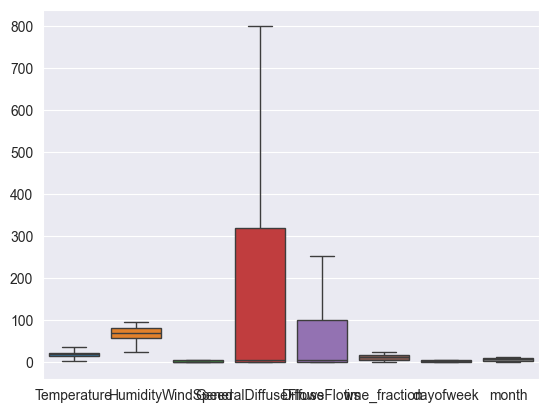

In [198]:
sns.boxplot(df.drop('PowerConsumption', axis=1))

# **Bivariate Analysis**

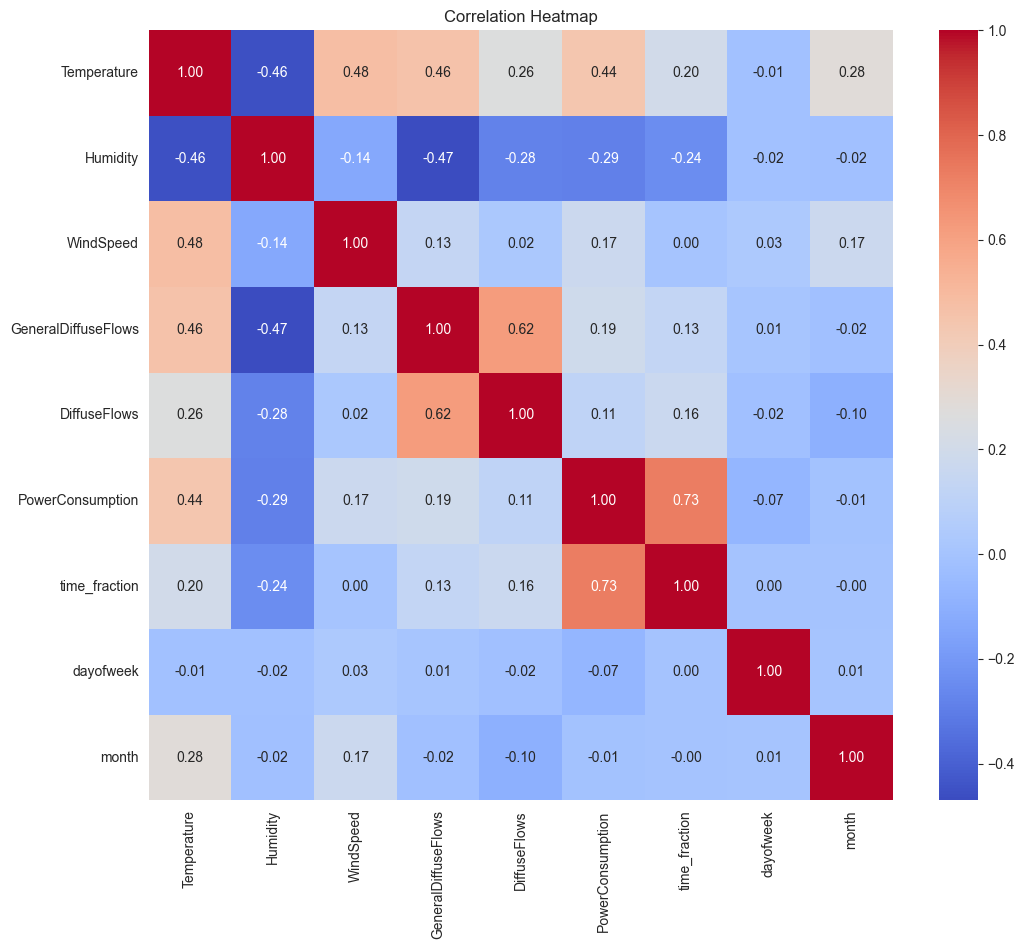

In [199]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

From the above HeatMap we can observe that the columns such as Humidity, DayofWeek , Month does not add to Power Consumption Therefore we simply can remove those columns

In [176]:
df = df.drop(['Humidity', 'month', 'dayofweek'], axis=1)

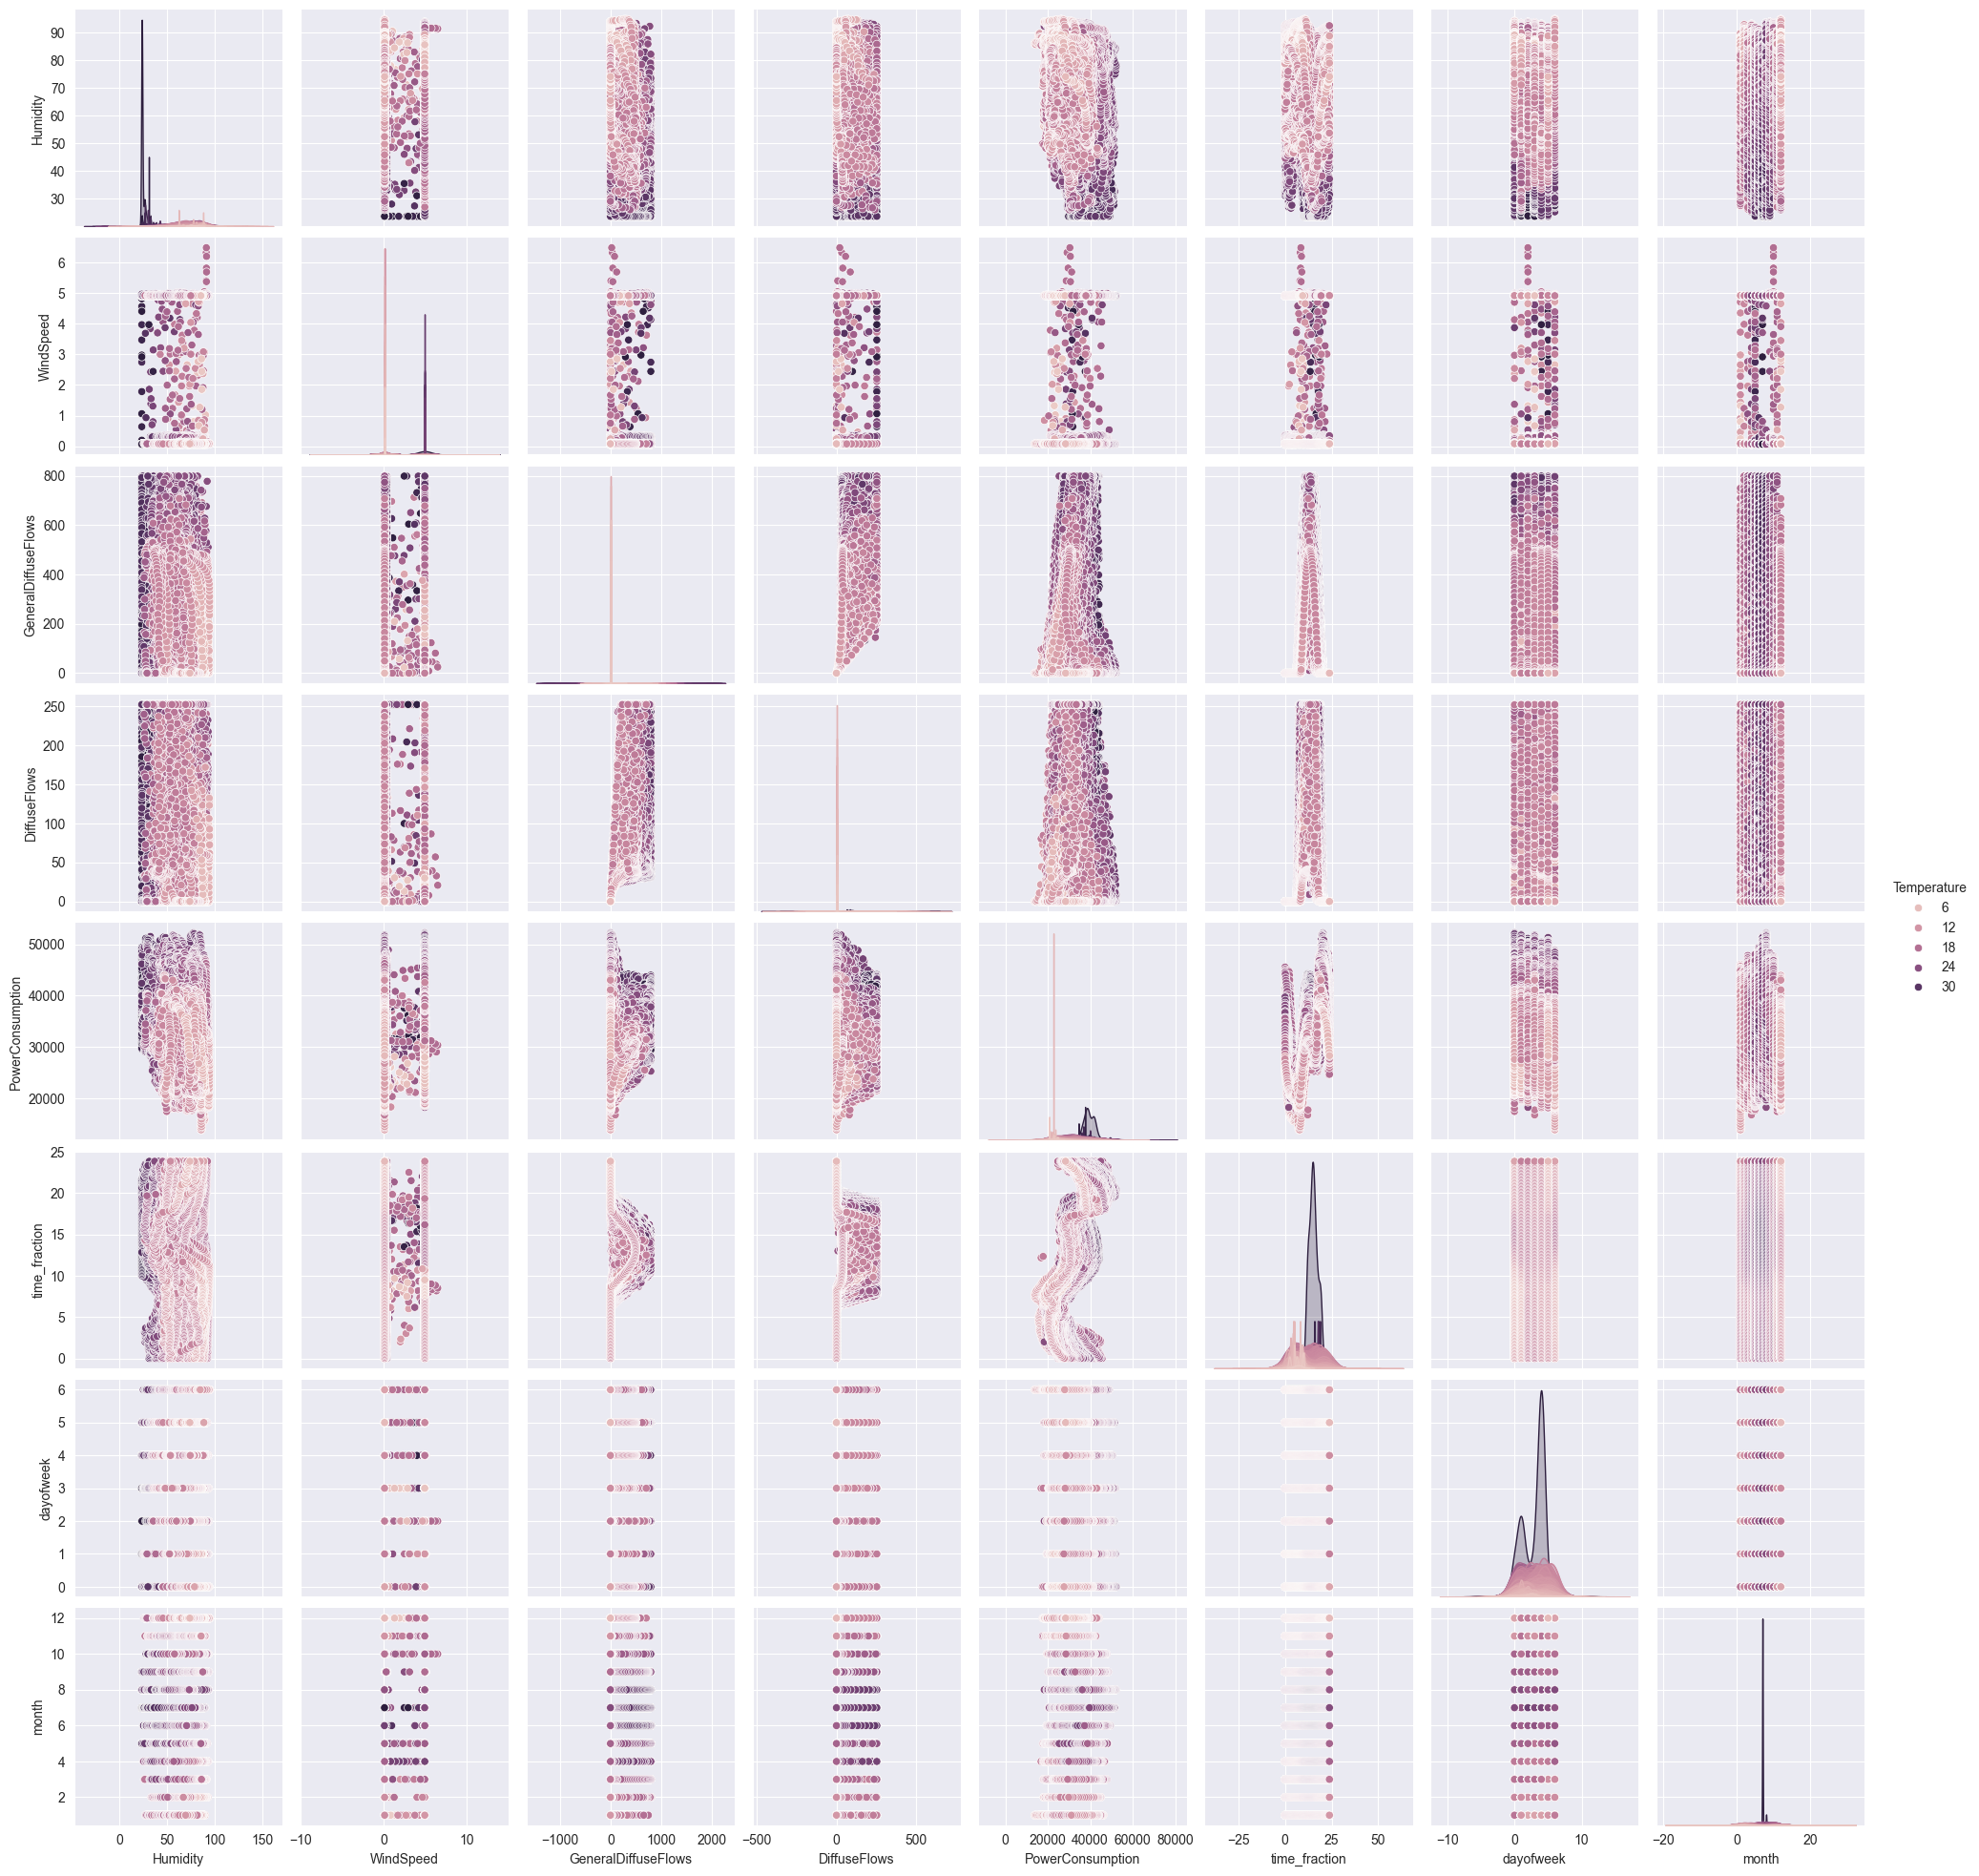

In [200]:
sns.pairplot(df,hue = 'Temperature')

# **Declaring Feature and Target Selection**

In [201]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,time_fraction,dayofweek,month
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,0.000000,6,1
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,0.166667,6,1
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,0.333333,6,1
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,0.500000,6,1
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,0.666667,6,1


In [202]:
X = df.drop('PowerConsumption', axis=1)
y = df['PowerConsumption']

Splitting data into training and testing sets

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (41932, 5)
Shape of X_test: (10484, 5)
Shape of y_train: (41932,)
Shape of y_test: (10484,)


# **Model Training**

**Initialize and train the model**

# Linear Regression

In [203]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [204]:
lrPredict = lr.predict(X_test)
lrMse = mean_squared_error(y_test, lrPredict)
lrR2 = r2_score(y_test, lrPredict)
print(f"Mean Squared Error: {lrMse}")
print(f"R 2 Score: {lrR2}")

Mean Squared Error: 18662473.402971998
R 2 Score: 0.6304049869418045


# Ridge And Lasso

In [205]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print("Ridge Regression -> MSE:", mean_squared_error(y_test, y_pred))
print("Ridge Regression -> R2:", r2_score(y_test, y_pred))

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print("Lasso Regression -> MSE:", mean_squared_error(y_test, y_pred))
print("Lasso Regression -> R2:", r2_score(y_test, y_pred))

Ridge Regression -> MSE: 18662473.102226604
Ridge Regression -> R2: 0.6304049928978208
Lasso Regression -> MSE: 18662469.93383958
Lasso Regression -> R2: 0.6304050556451329


# Decision Tree Regressor

In [206]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)  # No scaling needed for trees

y_pred = dt.predict(X_test)
print("Decision Tree -> MSE:", mean_squared_error(y_test, y_pred))
print("Decision Tree -> R2:", r2_score(y_test, y_pred))


Decision Tree -> MSE: 8268697.368258021
Decision Tree -> R2: 0.8362452154220399


# XG Boost Regressor

In [207]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
print("XGBoost -> MSE:", mean_squared_error(y_test, y_pred))
print("XGBoost -> R2:", r2_score(y_test, y_pred))

XGBoost -> MSE: 4719146.553035022
XGBoost -> R2: 0.9065411644945863


# With Random Forest Regressor

In [208]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)


**Make predictions**

In [118]:
y_pred = model.predict(X_test)

**Evaluate the model**

In [119]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R 2 Score: {r2}")

# **Hyperparameter Tuning**

In [121]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


**Model Evaluation**

In [143]:
print("R-squared:", r2_score(y_test, predictions))
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

R-squared: 0.9191556321631886
MAE: 1403.8432398289422
RMSE: 2020.442216019723


The accuracy is increased slightly

**Visualization of Predictions**

In [150]:
# subset = y_test.iloc[:720]  # first 720 hours (~1 month)
# plt.figure(figsize=(20,6))
# plt.plot(subset.index, subset, label='Actual')
# plt.plot(subset.index, predictions[:720], label='Predicted')
# plt.title('Power Consumption: Actual vs Predicted (1 Month)')
# plt.xlabel('Datetime')
# plt.ylabel('Power Consumption')
# plt.legend()
# plt.show()
# y_test.index = pd.to_datetime(y_test.index)
# y_daily = y_test.resample('D').mean()
# pred_daily = pd.Series(predictions, index=y_test.index).resample('D').mean()
#
# plt.figure(figsize=(20,6))
# plt.plot(y_daily, label='Actual')
# plt.plot(pred_daily, label='Predicted')
# plt.legend()
# plt.show()
#


In [151]:
Pkl_Filename = "model.pkl"
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(best_model, file)

In [152]:
with open(Pkl_Filename, 'rb') as file:
    Pickled_Model = pickle.load(file)

In [153]:
pred = Pickled_Model.predict(X_test)
pred

array([32988.96772876, 34452.08329746, 29177.50208928, ...,
       41235.52679126, 28412.34334776, 36167.11923304])